# Chromosome 8 Trans-Effects (BRCA)

1. Use the graphs to find the crossover genes
2. Using the CNV table and the gene chromosome locations, split the samples for each cancer type into has_cnv_event or does_not_have_cnv_event
3. For each protein in the protein table break down each column into two lists: samples that have the event and those that don't.
4. Run T-tests on these lists and store the df
5. Repeat for each type of cancer.

## Find Crossover Genes

In [1]:
!pip install cptac
!pip install --upgrade cptac

Requirement already up-to-date: cptac in c:\users\chels\anaconda3\lib\site-packages (0.8.0)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac

In [3]:
cptac.download(dataset="brca")
brca = cptac.Brca()

In [4]:
brca_cnv = brca.get_CNV()

In [5]:
def separate(hiCut, lowCut, data):
  """
  Counts the Number of patients with high and low value for each gene.
  """
  sepDict = dict()
  for column in data:
    numHi = 0
    numLow = 0
    numNeu = 0
    for i in data[column]:
        if i > hiCut:
            numHi += 1
        elif i < lowCut:
            numLow += 1
        else:
            numNeu += 1 
    sepDict[column] = [numHi, numNeu, numLow]
  return sepDict

In [6]:
def get_counts_and_average(data):
  """
  Takes a CNV dataframe and generates a dataframe with the counts of high, low and neutral values
  """
  df = pd.DataFrame(data = separate(.3,-.2,data), index = ["amplifications", "neutral", "deletions"])
  df = df.append(pd.DataFrame(data.mean(0), columns=['average']).transpose(), sort=True)
  return df.transpose()

In [33]:
brca_counts = get_counts_and_average(brca_cnv)

In [13]:
import pyensembl
ensembl = pyensembl.EnsemblRelease()

In [14]:
def add_chromo_and_loc(my_dict, cancer):
    chromo = list()
    locations = list()
    not_found = list()
    count = 0
    for gene in list(my_dict.index.get_level_values(0)):
        count += 1
        try:
            e_gene = ensembl.genes_by_name(gene)
            chromo.append(e_gene[0].contig)
            locations.append((e_gene[0].start + e_gene[0].end)/2)
        except:
            not_found.append(gene)
            chromo.append(None)
            locations.append(None)
    my_dict['chromo'] = chromo
    my_dict['location'] = locations
    my_dict['cancer'] = cancer
    print(len(not_found)/count)
    return my_dict

In [34]:
brca_counts = add_chromo_and_loc(brca_counts, "BRCA")

0.09678372446395407


In [19]:
chromosome_num = '8'

In [40]:
brca_counts_cleaned = brca_counts.dropna(subset=['location'])

In [43]:
brca_counts_cleaned_8 = brca_counts_cleaned[brca_counts_cleaned.chromo=='8']

In [58]:
def get_intersection_points(df):
    points = list()
    top = 'amp'
    for gene in df.iterrows():
        val = gene[1]['amplifications'] - gene[1]['deletions']
        if val > 0:
            cur_top = 'amp'
        else:
            cur_top = 'del'
        if cur_top != top:
            points.append(gene[1]['location'])
        top = cur_top
    return points

del amp
amp del
del amp
amp del
del amp
amp del
[166546.0, 37697900.5, 98042151.5, 98042151.5, 98042151.5, 98042151.5]


In [66]:
genes_before_intersect = brca_counts_cleaned_8[brca_counts_cleaned_8.deletions > 55]

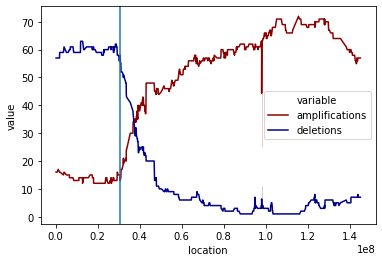

In [67]:
sns.lineplot(x="location", y="value", hue="variable", palette=['darkred', 'darkblue'], data=brca_counts_8)
plt.axvline(max(genes_before_intersect.location))

In [191]:
max(genes_before_intersect.location)

30794385.5

In [174]:
gene_list = list(brca_counts_cleaned_8[brca_counts_cleaned_8.location < max(genes_before_intersect.location)].index)
# gene_list = list(genes_before_intersect.index.get_level_values(0))

In [175]:
len(gene_list)

223

In [176]:
brca_cnv

Name                      7SK                                      \
Database_ID ENSG00000232512.2 ENSG00000249352.3 ENSG00000254144.2   
Patient_ID                                                          
CPT000814              -0.058            -0.496             0.466   
CPT001846               0.065            -0.126             0.148   
X01BR001                1.036            -0.309             1.265   
X01BR008                0.090             0.372             0.602   
X01BR009                0.375            -0.135             3.657   
...                       ...               ...               ...   
X21BR001               -0.069            -0.109             1.047   
X21BR002               -0.443             0.408             0.053   
X21BR010                0.238             0.282             0.012   
X22BR005                0.015             0.072             0.160   
X22BR006                0.365            -0.006             0.335   

Name                                                               \
Database_ID ENSG00000260682.2 ENSG00000271765.1 ENSG00000271818.1   
Patient_ID                                                          
CPT000814               0.058             0.453            -1.019   
CPT001846              -0.197            -0.132             0.273   
X01BR001                0.060             0.020            -0.058   
X01BR008               -0.060             0.115            -0.091   
X01BR009               -0.122            -0.138             0.104   
...                       ...               ...               ...   
X21BR001               -0.259             0.136            -0.289   
X21BR002               -0.458            -0.061            -0.009   
X21BR010               -0.324            -0.003            -0.016   
X22BR005               -0.290             0.083            -0.291   
X22BR006               -0.445             0.027            -0.001   

Name                     A1BG              A1CF                A2M  \
Database_ID ENSG00000121410.7 ENSG00000148584.9 ENSG00000175899.10   
Patient_ID                                                           
CPT000814              -0.396             0.006              1.089   
CPT001846              -0.187             0.000             -0.146   
X01BR001               -0.111            -0.051             -0.132   
X01BR008                0.059             0.238              0.509   
X01BR009                0.661            -0.126             -0.126   
...                       ...               ...                ...   
X21BR001               -0.183             0.060              0.104   
X21BR002                0.098            -0.004              0.008   
X21BR010                0.203            -0.008             -0.281   
X22BR005                0.029             0.079              0.075   
X22BR006               -0.029             0.052             -0.012   

Name                     A2ML1  ...           snoZ185           snoZ247  \
Database_ID ENSG00000166535.15  ... ENSG00000252672.1 ENSG00000252281.1   
Patient_ID                      ...                                       
CPT000814                1.089  ...            -0.475             0.031   
CPT001846               -0.146  ...             1.401            -0.096   
X01BR001                -0.132  ...             0.243             0.173   
X01BR008                 0.509  ...             0.177             0.107   
X01BR009                -0.126  ...             1.093             0.377   
...                        ...  ...               ...               ...   
X21BR001                 0.104  ...             0.132             0.000   
X21BR002                 0.008  ...            -0.086            -0.001   
X21BR010                -0.281  ...             0.279            -0.015   
X22BR005                 0.075  ...            -0.101            -0.109   
X22BR006                -0.012  ...             0.388            -0.017   

Name                  snoZ278     

In [177]:
df_before_intersect = brca_cnv[gene_list]

In [178]:
df_before_intersect

Name,OR4F21,RPL23AP53,ZNF596,FBXO25,TDRP,ERICH1,DLGAP2,CLN8,MIR596,ARHGEF10,...,MIR3148,LEPROTL1,MBOAT4,DCTN6,TUBBP1,RBPMS,GTF2E2,SMIM18,GSR,UBXN8
Database_ID,ENSG00000176269.3,ENSG00000223508.5,ENSG00000172748.7,ENSG00000147364.12,ENSG00000180190.7,ENSG00000104714.9,ENSG00000198010.7,ENSG00000182372.6,ENSG00000207826.1,ENSG00000104728.11,...,ENSG00000264788.1,ENSG00000104660.13,ENSG00000177669.3,ENSG00000104671.3,ENSG00000127589.4,ENSG00000157110.11,ENSG00000197265.4,ENSG00000253457.1,ENSG00000104687.8,ENSG00000104691.10
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,...,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551
CPT001846,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,...,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140
X01BR001,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,...,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344
X01BR008,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,...,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.414
X01BR009,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,...,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,0.000,0.000,-0.362,...,0.821,-0.099,-0.099,-0.099,-0.099,0.129,0.129,0.129,0.129,0.129
X21BR002,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,...,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015


In [179]:
def calc_percent(row):
    values = list(row)
    return(len([x for x in values if x <= -0.2]) / len(values))

In [180]:
df_before_intersect['percent'] = df_before_intersect.apply(calc_percent, axis=1)
# count = 0
# for row in df_before_intersect.iterrows():
#     calc_percent(row)

C:\Users\chels\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
df_before_intersect

Name,OR4F21,RPL23AP53,ZNF596,FBXO25,TDRP,ERICH1,DLGAP2,CLN8,MIR596,ARHGEF10,...,LEPROTL1,MBOAT4,DCTN6,TUBBP1,RBPMS,GTF2E2,SMIM18,GSR,UBXN8,percent
Database_ID,ENSG00000176269.3,ENSG00000223508.5,ENSG00000172748.7,ENSG00000147364.12,ENSG00000180190.7,ENSG00000104714.9,ENSG00000198010.7,ENSG00000182372.6,ENSG00000207826.1,ENSG00000104728.11,...,ENSG00000104660.13,ENSG00000177669.3,ENSG00000104671.3,ENSG00000127589.4,ENSG00000157110.11,ENSG00000197265.4,ENSG00000253457.1,ENSG00000104687.8,ENSG00000104691.10,
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,...,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,-0.551,1.000000
CPT001846,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,0.242,...,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,-0.140,0.000000
X01BR001,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,-0.346,...,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,-0.344,1.000000
X01BR008,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,0.372,...,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.414,0.000000
X01BR009,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,-0.190,...,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,-0.193,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,-0.375,0.000,0.000,-0.362,...,-0.099,-0.099,-0.099,-0.099,0.129,0.129,0.129,0.129,0.129,0.825112
X21BR002,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,-0.445,...,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,0.708520


In [182]:
have_event = list(df_before_intersect[df_before_intersect.percent >.8].index)
# cols = [col for col in df_before_intersect.columns if col not in have_event]
no_event = [x for x in df_before_intersect.index if x not in have_event]

In [183]:
print(len(have_event))
print(len(no_event))
print(len(have_event) + len(no_event))
print(len(df_before_intersect))

57
65
122
122


In [184]:
brca_prot = brca.get_proteomics()

In [185]:
from scipy import stats

In [186]:
def t_test(col):
    has_ev = col[col.index.isin(have_event)]
    no_ev = col[col.index.isin(no_event)]
    return stats.ttest_ind(has_ev, no_ev)

In [187]:
brca_t_test = brca_prot.apply(t_test).transpose()

C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\chels\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [188]:
brca_t_test = brca_t_test.rename(columns={0:"statistic", 1:"p-value"})

In [192]:
brca_t_test

,,statistic,p-value
Name,Database_ID,,
A1BG,NP_570602.2,-0.406598,0.685027
A2M,NP_000005.2,1.138378,0.257230
A2ML1,NP_653271.2|NP_001269353.1,-0.464293,0.643279
AAAS,NP_056480.1|NP_001166937.1,0.465778,0.642219
AACS,NP_076417.2|NP_001306769.1|NP_001306768.1,0.361501,0.718361
...,...,...,...
ZXDC,NP_079388.3|NP_001035743.1,NaN,NaN
ZYG11B,NP_078922.1,0.220883,0.825559
ZYX,NP_001010972.1,-0.638963,0.524065


In [4]:
from scipy import stats

In [138]:
val1 = [1,2,3,4,5,6]
val2 = [4,5,3]

In [139]:
stats.ttest_ind(val1, val2)

Ttest_indResult(statistic=-0.42365927286816174, pvalue=0.6845283355605284)

In [7]:
print(t)
print(p)

-0.42365927286816174
0.6845283355605284
